In [138]:
#Load Packages and Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

train['source'] = 'Train'
test['source'] = 'Test'
data = pd.concat([train, test], ignore_index = True, sort = True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [3]:

data.head()


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [5]:
data.describe()


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [7]:
data.isnull().sum()


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [8]:
data.nunique()


Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

Exploratory Data Analysis


In [9]:
#Filter categorical variables
cat_col = [x for x in data.dtypes.index if data.dtypes[x]=='object']
cat_col 
cat_col = [x for x in cat_col if x not in ["Item_Identifier","Outlet_Identifier","source"]]
cat_col

for col in cat_col:
    print ("frequency of categorical variables")
    print(col)
    print(data[col].value_counts())

frequency of categorical variables
Item_Fat_Content
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
frequency of categorical variables
Item_Type
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
frequency of categorical variables
Outlet_Location_Type
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64
frequency of categorical variables
Outlet_Size
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count,

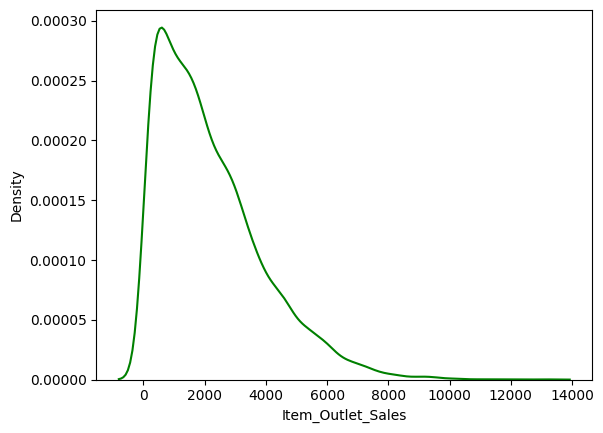

In [86]:
sns.kdeplot(data.Item_Outlet_Sales, color = "green")
plt.show()

<Axes: xlabel='Item_Weight'>

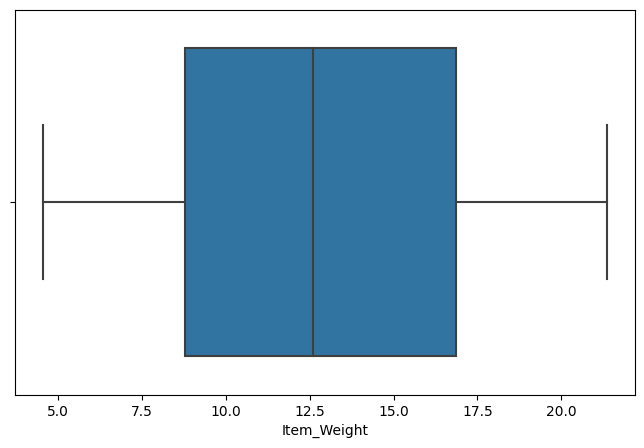

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train, x='Item_Weight')


<Axes: xlabel='Item_Weight'>

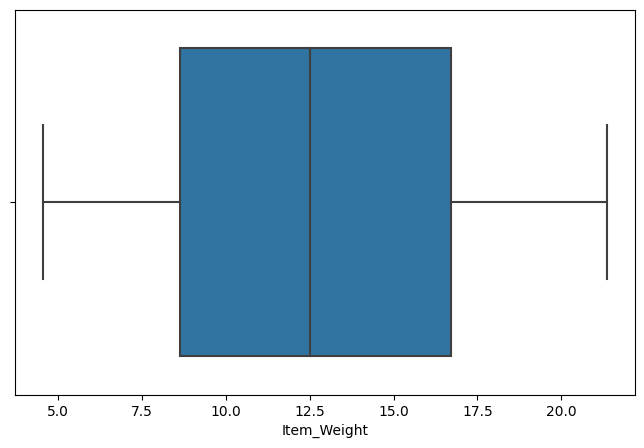

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=test, x='Item_Weight')

In [11]:
s_profit = pd.DataFrame({'Item_Type': data.Item_Type, 'Profit': data.Item_Outlet_Sales})
s_profit.head()

,Item_Type,Profit
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [87]:
s_profit = pd.DataFrame({'Item_Type': data.Item_Type, 'Profit': data.Item_Outlet_Sales})
s_profit.head()

,Item_Type,Profit
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


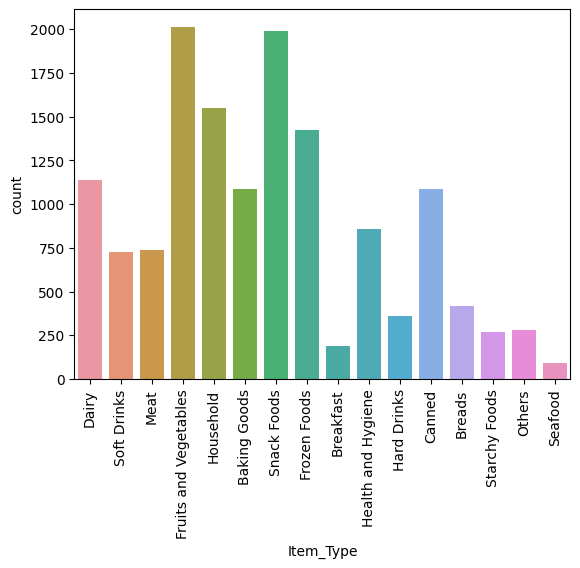

In [12]:
sns.countplot(x = "Item_Type", data = data)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Outlet_Identifier'>

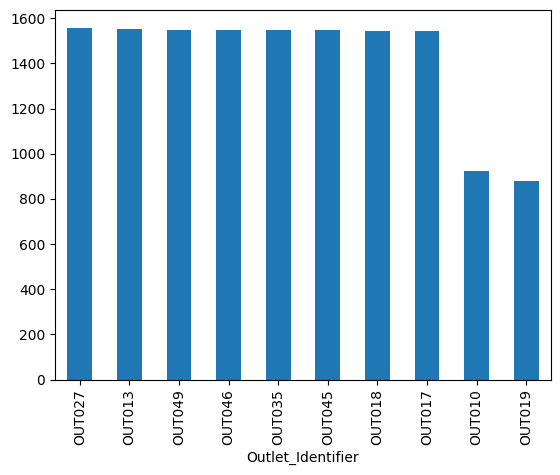

In [89]:
data.Outlet_Identifier.value_counts().plot(kind = "bar")


Univariate Analysis


<Axes: ylabel='Frequency'>

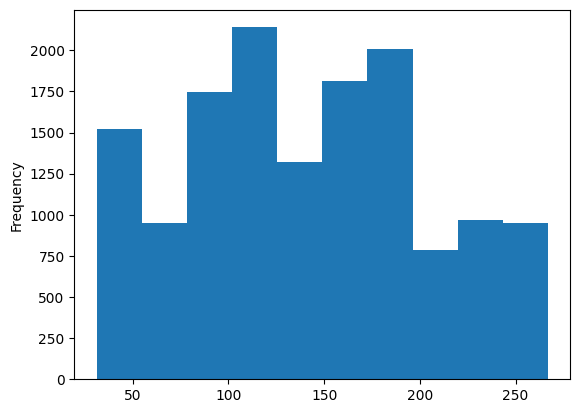

In [13]:
data['Item_MRP'].plot.hist()

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

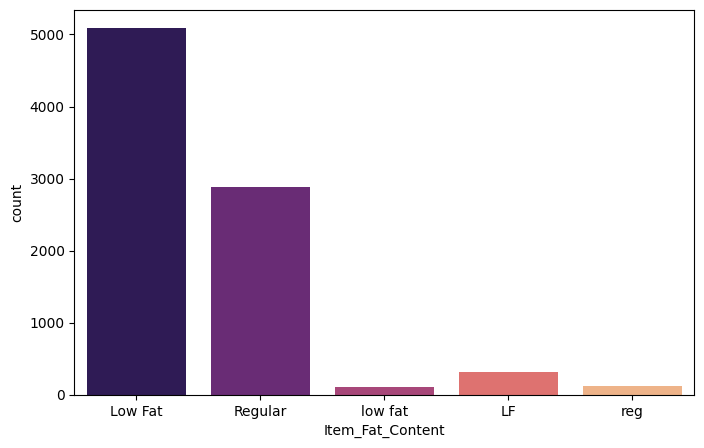

In [15]:
plt.figure(figsize=(8,5))
sns.countplot( data=train,x= 'Item_Fat_Content', palette='magma')



<Axes: xlabel='Item_Type', ylabel='count'>

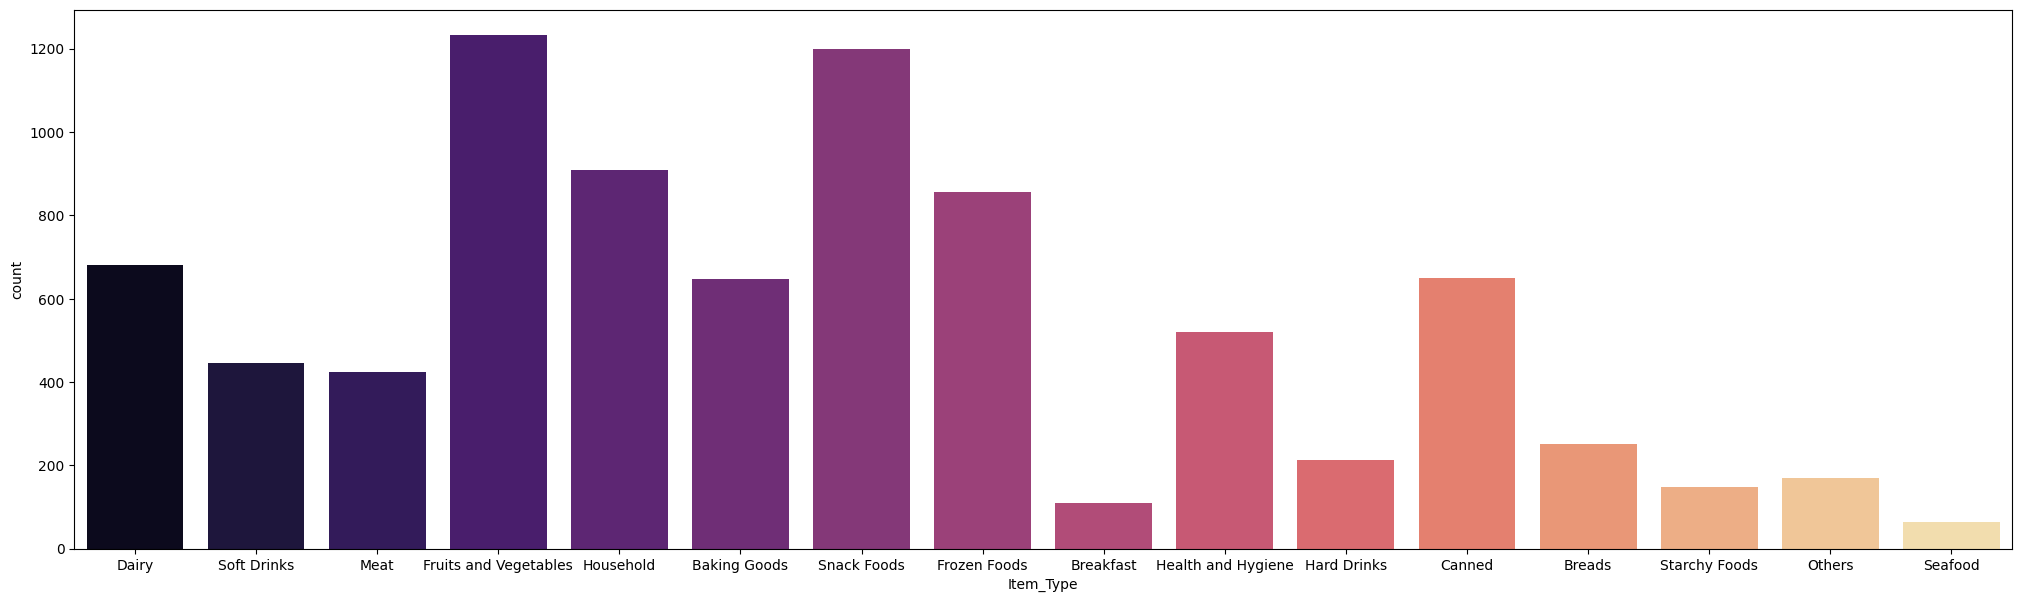

In [17]:
plt.figure(figsize=(25,7))
sns.countplot(data=train, x= 'Item_Type',palette='magma')

<Axes: xlabel='Outlet_Size', ylabel='count'>

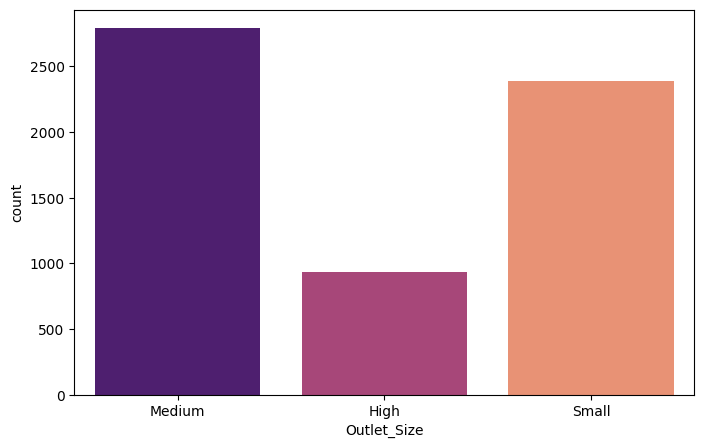

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=train, x='Outlet_Size',palette='magma')

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

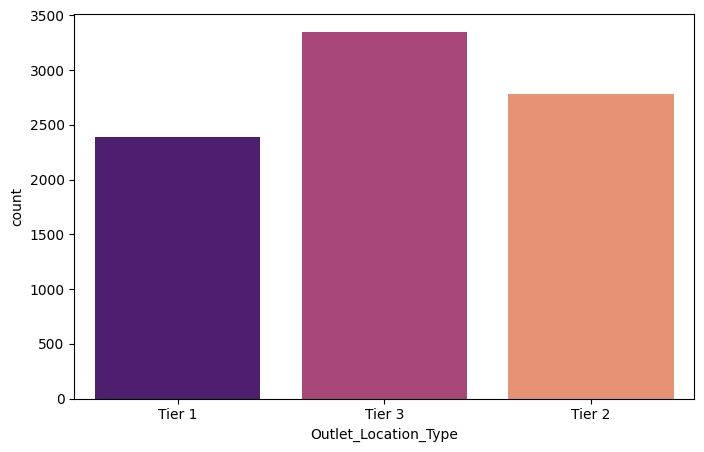

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=train, x='Outlet_Location_Type',palette='magma')

Bivariate Analysis


In [30]:
train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

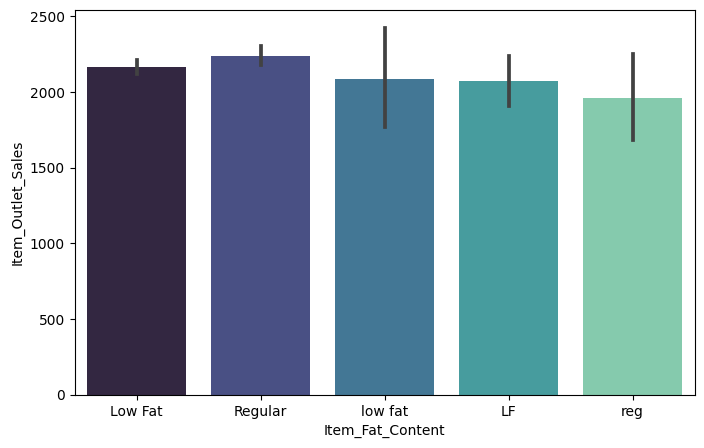

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y= 'Item_Outlet_Sales',data=train,palette='mako')

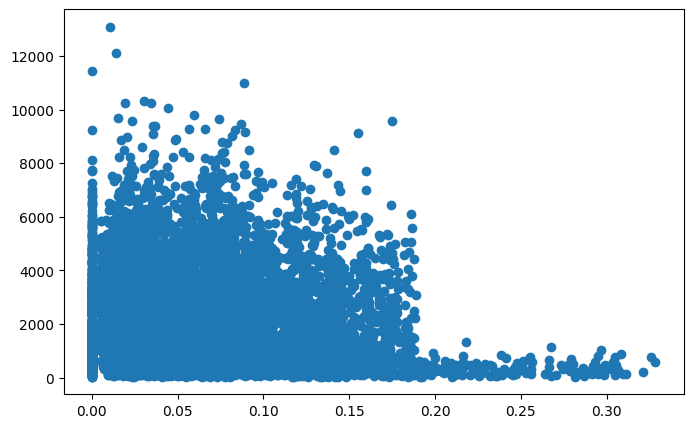

In [33]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

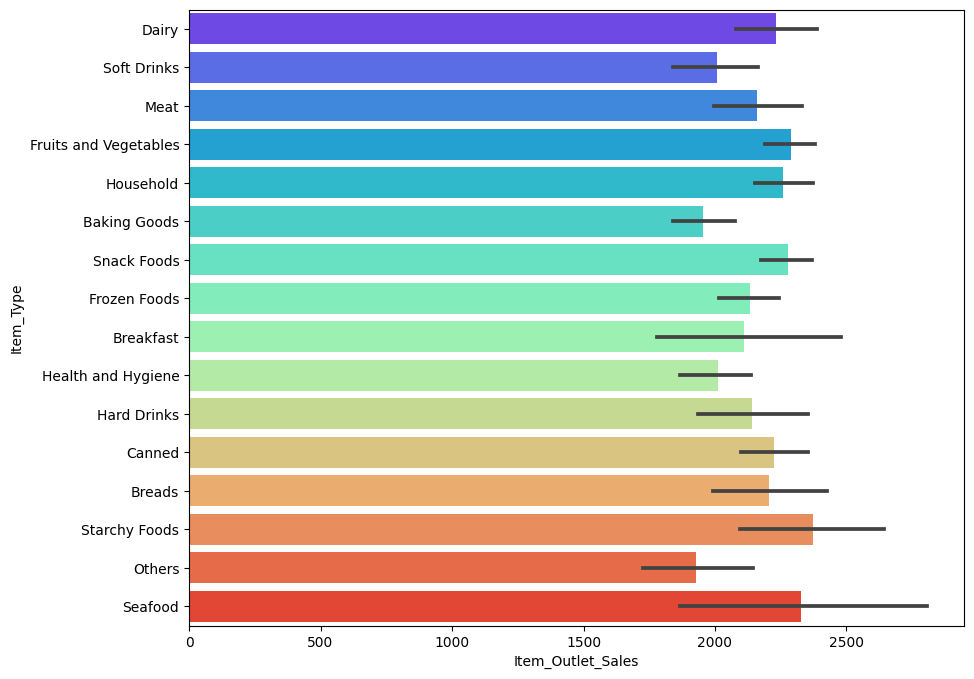

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='rainbow')

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

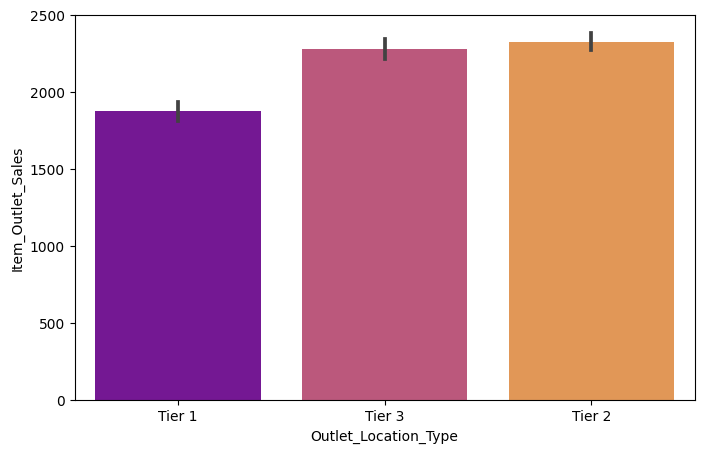

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')

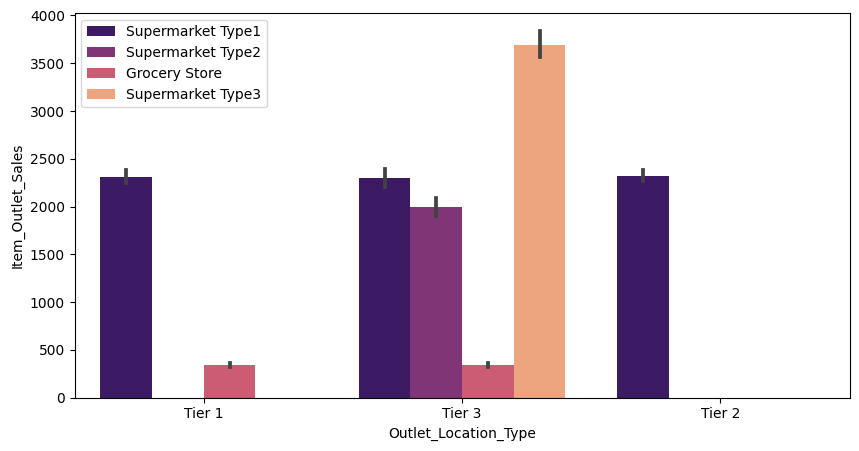

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'Outlet_Location_Type',y= 'Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

Data Cleaning


In [19]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

Filling missing values


In [20]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

data['Outlet_Size'].value_counts()


Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [21]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

data.apply(lambda x: sum(x.isnull()))


Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

Feature Engineering


In [51]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [52]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [55]:
data['Outlet_Years'] = 2018 - data['Outlet_Establishment_Year']

Mean_Visibility = data['Item_Visibility'].mean()

data['Item_Visibility_MeanRatio'] = data.apply(lambda x:x['Item_Visibility'] / Mean_Visibility,axis=1)


In [56]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [59]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,Train
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,Train
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,Train
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,3,2,0,732.3800,Train
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,Train


Model Building


In [72]:
import statsmodels.api as sm


In [71]:
# Reading modified data 

train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [73]:
x = train2[[ 'Item_MRP', 'Item_Fat_Content_0', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3']]
y = train2['Item_Outlet_Sales']

In [74]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_MRP            8523 non-null   float64
 1   Item_Fat_Content_0  8523 non-null   bool   
 2   Outlet_Type_0       8523 non-null   bool   
 3   Outlet_Type_1       8523 non-null   bool   
 4   Outlet_Type_2       8523 non-null   bool   
 5   Outlet_Type_3       8523 non-null   bool   
dtypes: bool(5), float64(1)
memory usage: 108.3 KB


In [75]:
x.shape, y.shape


((8523, 6), (8523,))

In [76]:
y = np.array(y).reshape(8523,1)


In [80]:
y_train = train2.Item_Outlet_Sales


In [81]:
x.head()


,const,Item_MRP,Item_Fat_Content_0,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,1.0,249.8092,True,False,True,False,False
1,1.0,48.2692,False,False,False,True,False
2,1.0,141.6180,True,False,True,False,False
3,1.0,182.0950,False,True,False,False,False
4,1.0,53.8614,True,False,True,False,False


In [82]:
y_train.head()


0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [117]:
print(LR.steps)


[('standardscaler', StandardScaler()), ('linearregression', LinearRegression())]


In [120]:
y_pred = regressor.predict(x)
y_pred


array([[4002.3306944 ],
       [ 568.27820436],
       [2309.78968022],
       ...,
       [1425.97362013],
       [1426.569546  ],
       [1274.9247316 ]])

In [146]:
print(type(regressor))


<class 'sklearn.linear_model._base.LinearRegression'>
